In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE


In [90]:
df = pd.read_csv("Data_processed.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Missed_App,GapDays,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_Female,show
0,1,0,62,0,1,0,0,0,0,1,1
1,2,0,56,0,0,0,0,0,0,0,1
2,3,0,62,0,0,0,0,0,0,1,1
3,4,0,8,0,0,0,0,0,0,1,1
4,5,0,56,0,1,1,0,0,0,1,1


In [91]:
df.shape

(106980, 11)

In [92]:
Y = df.show
df.drop('show', inplace= True, axis= 1)
Y.value_counts()

1    85303
0    21677
Name: show, dtype: int64

In [93]:
X = df
X.head()

,Missed_App,GapDays,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_Female
0,1,0,62,0,1,0,0,0,0,1
1,2,0,56,0,0,0,0,0,0,0
2,3,0,62,0,0,0,0,0,0,1
3,4,0,8,0,0,0,0,0,0,1
4,5,0,56,0,1,1,0,0,0,1


In [94]:
X.shape

(106980, 10)

In [95]:
Y.shape

(106980,)

In [96]:
X_train, X_test, y_train , y_test = train_test_split(X,Y, train_size=0.7, test_size=0.3, random_state=100)

In [97]:
scaler = StandardScaler()

X_train[["Missed_App", "GapDays", "Age"]] = scaler.fit_transform(X_train[["Missed_App", "GapDays", "Age"]])

In [98]:
X_train.head()

,Missed_App,GapDays,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_Female
75411,0.710154,-0.668873,0.652156,0,1,1,0,0,0,0
59114,0.167512,2.088684,-0.461697,0,0,0,0,0,1,1
5542,-1.542257,-0.209281,-0.283480,0,0,0,0,0,0,1
4612,-1.570838,-0.406249,-1.040900,0,0,0,0,0,1,0
6767,-1.503795,-0.406249,0.251169,1,1,0,0,0,1,1


In [99]:
log1 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   show   No. Observations:                74886
Model:                            GLM   Df Residuals:                    74875
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36131.
Date:                Thu, 22 Jun 2023   Deviance:                       72263.
Time:                        02:50:29   Pearson chi2:                 7.36e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.04051
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5983      0.019     83.966      0.000       1.561       1.636
Missed_App        0.0660      0.009      7.057      0.000       0.048       0.084
GapDays          -0.3532      0.009    -39.228      0.000      -0.371      -0.336
Age               0.2074      0.011     18.476      0.000       0.185       0.229
Scholarship      -0.1740      0.030     -5.798      0.000      -0.233      -0.115
Hypertension      0.0005      0.030      0.017      0.987      -0.058       0.059
Diabetes         -0.1169      0.041     -2.821      0.005      -0.198      -0.036
Alcoholism       -0.1729      0.055     -3.144      0.002      -0.281      -0.065
Handicap         -0.0826      0.059     -1.405      0.160      -0.198       0.033
SMS_received     -0.3532      0.021    -17.227      0.000      -0.393      -0.313
Gender_Female    -0.0166      0.020     -0.827      0.408      -0.056       0.023
=================================================================================
"""

In [100]:
logreg = LogisticRegression()

In [101]:
rfe = RFE(logreg, n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False])

In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Missed_App', True, 1),
 ('GapDays', True, 1),
 ('Age', True, 1),
 ('Scholarship', True, 1),
 ('Hypertension', False, 3),
 ('Diabetes', True, 1),
 ('Alcoholism', True, 1),
 ('Handicap', True, 1),
 ('SMS_received', True, 1),
 ('Gender_Female', False, 2)]

In [104]:
col = X_train.columns[rfe.support_]
col

Index(['Missed_App', 'GapDays', 'Age', 'Scholarship', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received'],
      dtype='object')

In [105]:
X_train.columns[~rfe.support_]

Index(['Hypertension', 'Gender_Female'], dtype='object')

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   show   No. Observations:                74886
Model:                            GLM   Df Residuals:                    74877
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36132.
Date:                Thu, 22 Jun 2023   Deviance:                       72263.
Time:                        02:50:30   Pearson chi2:                 7.36e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.04050
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.5878      0.013    120.269      0.000       1.562       1.614
Missed_App       0.0659      0.009      7.050      0.000       0.048       0.084
GapDays         -0.3532      0.009    -39.264      0.000      -0.371      -0.336
Age              0.2065      0.010     20.472      0.000       0.187       0.226
Scholarship     -0.1773      0.030     -5.966      0.000      -0.236      -0.119
Diabetes        -0.1164      0.039     -2.994      0.003      -0.193      -0.040
Alcoholism      -0.1674      0.055     -3.071      0.002      -0.274      -0.061
Handicap        -0.0809      0.059     -1.378      0.168      -0.196       0.034
SMS_received    -0.3538      0.020    -17.270      0.000      -0.394      -0.314
================================================================================
"""

In [107]:
col  = col.drop('Handicap')
col

Index(['Missed_App', 'GapDays', 'Age', 'Scholarship', 'Diabetes', 'Alcoholism',
       'SMS_received'],
      dtype='object')

In [108]:
X_train.head()

,Missed_App,GapDays,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_Female
75411,0.710154,-0.668873,0.652156,0,1,1,0,0,0,0
59114,0.167512,2.088684,-0.461697,0,0,0,0,0,1,1
5542,-1.542257,-0.209281,-0.283480,0,0,0,0,0,0,1
4612,-1.570838,-0.406249,-1.040900,0,0,0,0,0,1,0
6767,-1.503795,-0.406249,0.251169,1,1,0,0,0,1,1


In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   show   No. Observations:                74886
Model:                            GLM   Df Residuals:                    74878
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36133.
Date:                Thu, 22 Jun 2023   Deviance:                       72265.
Time:                        02:50:48   Pearson chi2:                 7.36e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.04048
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.5859      0.013    120.800      0.000       1.560       1.612
Missed_App       0.0659      0.009      7.048      0.000       0.048       0.084
GapDays         -0.3530      0.009    -39.252      0.000      -0.371      -0.335
Age              0.2057      0.010     20.428      0.000       0.186       0.225
Scholarship     -0.1773      0.030     -5.965      0.000      -0.235      -0.119
Diabetes        -0.1186      0.039     -3.053      0.002      -0.195      -0.042
Alcoholism      -0.1672      0.055     -3.068      0.002      -0.274      -0.060
SMS_received    -0.3533      0.020    -17.249      0.000      -0.393      -0.313
================================================================================
"""

In [112]:
X_train[col].head()

,Missed_App,GapDays,Age,Scholarship,Diabetes,Alcoholism,SMS_received
75411,0.710154,-0.668873,0.652156,0,1,0,0
59114,0.167512,2.088684,-0.461697,0,0,0,1
5542,-1.542257,-0.209281,-0.283480,0,0,0,0
4612,-1.570838,-0.406249,-1.040900,0,0,0,1
6767,-1.503795,-0.406249,0.251169,1,0,0,1


In [113]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

75411    0.868114
59114    0.601412
5542     0.817548
4612     0.742367
6767     0.759747
83183    0.841736
45202    0.640842
1101     0.667613
11648    0.807943
871      0.831644
dtype: float64

In [114]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86811439, 0.60141178, 0.8175477 , 0.74236663, 0.75974742,
       0.84173632, 0.64084237, 0.66761347, 0.80794337, 0.83164422])

In [115]:
y_train_pred_final = pd.DataFrame({'show':y_train.values, 'show_prob':y_train_pred})
y_train_pred_final['index'] = y_train.index
y_train_pred_final.head()

,show,show_prob,index
0,1,0.868114,75411
1,1,0.601412,59114
2,0,0.817548,5542
3,1,0.742367,4612
4,0,0.759747,6767


In [119]:
y_train_pred_final['predicted'] = y_train_pred_final.show_prob.map(lambda x: 1 if x > 0.7 else 0)
y_train_pred_final.head()

,show,show_prob,index,predicted
0,1,0.868114,75411,1
1,1,0.601412,59114,0
2,0,0.817548,5542,1
3,1,0.742367,4612,1
4,0,0.759747,6767,1


In [120]:
from sklearn import metrics

In [121]:
# Creating Confusion metrics
confusion  = metrics.confusion_matrix(y_train_pred_final.show, y_train_pred_final.predicted)
print(confusion)  # first give actual then given predicted

[[ 3017 12110]
 [ 5897 53862]]


In [ ]:
print(metrics.accuracy_score(y_train_pred_final.show, y_train_pred_final.predicted))

0.7595411692439175


## Accuracy is about 0.7595411692439175

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIF's 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
6,SMS_received,1.20
1,GapDays,1.14
4,Diabetes,1.13
2,Age,1.12
3,Scholarship,1.07
5,Alcoholism,1.03
0,Missed_App,1.00


In [125]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.show, y_train_pred_final.show_prob, drop_intermediate = False )

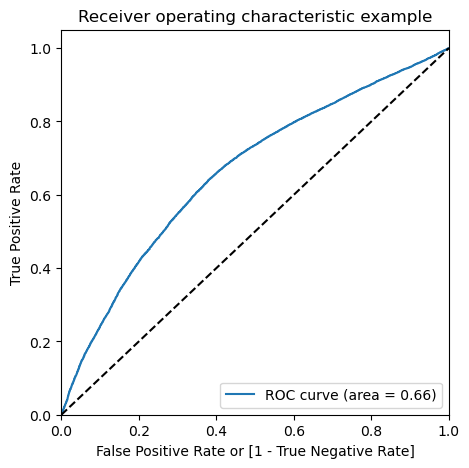

In [127]:
draw_roc(y_train_pred_final.show, y_train_pred_final.show_prob)

In [128]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.show_prob.map(lambda x : 1 if x > i else 0)

In [129]:
y_train_pred_final.head()

,show,show_prob,index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.868114,75411,1,1,1,1,1,1,1,1,1,1,0
1,1,0.601412,59114,0,1,1,1,1,1,1,1,0,0,0
2,0,0.817548,5542,1,1,1,1,1,1,1,1,1,1,0
3,1,0.742367,4612,1,1,1,1,1,1,1,1,1,0,0
4,0,0.759747,6767,1,1,1,1,1,1,1,1,1,0,0


In [130]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.show, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1]) / total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.798000  1.000000  0.000000
0.1   0.1  0.797893  0.999816  0.000198
0.2   0.2  0.797733  0.999448  0.000859
0.3   0.3  0.797532  0.999113  0.001190
0.4   0.4  0.797158  0.997975  0.003834
0.5   0.5  0.794581  0.991717  0.015800
0.6   0.6  0.785340  0.969762  0.056786
0.7   0.7  0.759541  0.901320  0.199445
0.8   0.8  0.657226  0.676802  0.579890
0.9   0.9  0.212977  0.015161  0.994447


1    85303
0    21677
Name: show, dtype: int64